# Boilerplate

Import some useful packages. Note that I set mplstyle as `fast` to increase rendering efficiency.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as colormaps
import matplotlib.colors as colors
import matplotlib.style as mplstyle
import numpy as np
import scipy
from matplotlib.colors import LogNorm
mplstyle.use('fast')

Notebook settings for animation:

In [2]:
animate = True
from cplt3d.generator_funcs import spin_3d_plot

Generate some data for the Gaussian pdf and take some samples:

In [3]:
# generate the pdf of the Gaussian
N = 32
X,Y,Z = np.linspace(-4,4,N),np.linspace(-4,4,N),np.linspace(-4,4,N)
X,Y,Z = np.meshgrid(X,Y,Z)
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
pts = np.array([X,Y,Z]).T
GAUSSIAN = scipy.stats.multivariate_normal.pdf(pts,mean = [0,0,0],cov = [[1,0,0],[0,2,0],[0,0,3]])

In [4]:
# take some samples from a Gaussian
N = 10000
std = 0.3
np.random.seed(123456)
pts_samples = np.random.multivariate_normal(mean = [0,0,0],cov = [[std,0,0],[0,std,0],[0,0,std]],size = N)
GAUSSIAN_samples = np.ones(len(pts_samples))

In [5]:
# take some samples from a bimodal distribution
N = 10000
std = 0.3
pos = 1
pts_samples_bi_1 = np.random.multivariate_normal(mean = [pos,pos,pos],cov = [[std,0,0],[0,std,0],[0,0,std]],size = N)
pts_samples_bi_2 = np.random.multivariate_normal(mean = [-pos,-pos,-pos],cov = [[std,0,0],[0,std,0],[0,0,std]],size = N)
pts_samples_bi = list(pts_samples_bi_1) + list(pts_samples_bi_2)
GAUSSIAN_samples_bi = np.ones(len(pts_samples_bi))

# Uniform Plotting

Import `cplt3d`'s generator functions that we are interested in:

In [6]:
from cplt3d.generator_funcs import uniform_histogram,uniform_nearest_interpolator,uniform_linear_interpolator

Set the number of bins to use in plotting:

In [7]:
N_bins = 2**4

We can easily plot using `matplotlib` objects. For instance, we can plot a nearest interpolation of the Gaussian:

/var/folders/q8/trn9pvn13rz106_g091b9gqc0000gn/T/ipykernel_8089/1536505350.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = colormaps.get_cmap('viridis')


finding bins within region
x in ((-4.0, 4.0))
y in ((-4.0, 4.0))
z in ((-4.0, 4.0))
starting coordinate fetch using wrap...
interpolating...
done interpolating 0.007048130035400391 seconds
evaluating...
done evaluating 0.0033121109008789062 seconds
finished coordinate fetch in 0.010744810104370117 seconds
identified (4096, (16, 16, 16)) boxes
computing things to use in plotter...
using vmin of 6.908443377324111e-08
using vmax of 0.02552856610989572
filled is float and filled_invert=False, so removing all boxes with result under 30.0% or result=5.7621795969883906e-05
this eliminates 1232 voxels, which is 30.078125% of the total
finished, ready to plot!
plotting...
finished plotting


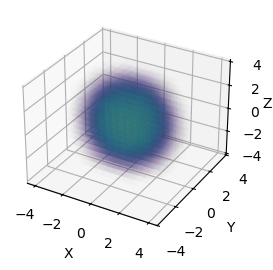

In [8]:
# Prepare the figure 
fig = plt.figure(figsize = (3,3))
ax = fig.add_subplot(projection = '3d')

# Prepare the colormap. Note that we use a non-linear alpha to make the center clearer
cmap = colormaps.get_cmap('viridis')
use_cmap = cmap(np.arange(cmap.N))
use_cmap[:,-1] = np.linspace(0,1,cmap.N)**1.7
use_cmap = colors.ListedColormap(use_cmap)

# Plot the function
uniform_nearest_interpolator(ax,pts,GAUSSIAN,bins = N_bins,filled = 0.3,cmap = use_cmap,verbose = True)

# Edit some figure settings and save it
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.zaxis.labelpad=-3.5
fig.savefig('./Images/1_Nearest-Uniform_Gaussian.png',dpi = 300)

Or a linear interpolation of the Gaussian:

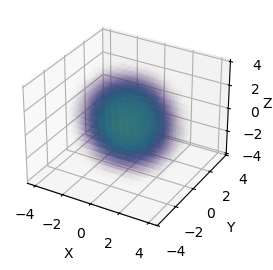

In [9]:
# Prepare the figure 
fig = plt.figure(figsize = (3,3))
ax = fig.add_subplot(projection = '3d')

# Plot the function
uniform_linear_interpolator(ax,pts,GAUSSIAN,bins = N_bins,filled = 0.3,cmap = use_cmap,verbose = False)

# Edit some figure settings and save it
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.zaxis.labelpad=-3.5
fig.savefig('Images/2_Linear-Uniform_Gaussian.png',dpi = 300)

We can also plot a 3d histogram of the Gaussian samples:

/var/folders/q8/trn9pvn13rz106_g091b9gqc0000gn/T/ipykernel_8089/575387401.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = colormaps.get_cmap('inferno')


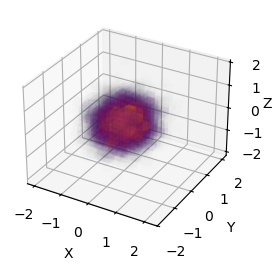

In [10]:
# Prepare the figure
fig = plt.figure(figsize = (3,3))
ax = fig.add_subplot(projection = '3d')

# Prepare the colormap
cmap = colormaps.get_cmap('inferno')
use_cmap = cmap(np.arange(cmap.N))
use_cmap[:,-1] = np.linspace(0,1,cmap.N)**1.7
use_cmap = colors.ListedColormap(use_cmap)

# Generate the uniform histogram
uniform_histogram(ax,pts_samples,GAUSSIAN_samples,bins = N_bins,filled = 0.3,cmap = use_cmap,verbose = False)

# Edit some figure settings and save it
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.zaxis.labelpad=-3.5
fig.savefig('Images/3_Histogram-Uniform_Gaussian.png',dpi = 300)

# Tree Plotting

Often, it is useful to have a dynamic bin-size in 3d histogram plotting because the number of polygons one must plot scales as $6N^3$. This is especially true in cases where (1) a small binsize is required and (2) most of the points of interest are within a small region. Dynamic sizing can be done using the `tree_histogram` method.

We can begin by importing the method:

In [11]:
from cplt3d.generator_funcs import tree_histogram

Then generating a tree histogram is as easy as generating a regular histogram:

finding bins within region
x in ((-1.9687984065517807, 2.1457367716255384))
y in ((-1.7394337604875005, 1.9979517846368298))
z in ((-2.089994979283934, 2.004688604821508))
starting coordinate fetch using wrap...
running from Resolution None to None
Found min_resolution is None, recomputing min_resolution...
finding largest size with one region having zero particles...
min_resolution=1 doesn't do it, continuing
found minimal gets-zero min_resolution=2
using min_resolution=2
Found max_resolution is None, recomputing max_resolution...
finding average volume per particle...
found max_resolution=5 - volume=0.001921582760295551 units^3
using max_resolution=5
dist sigmoid <class 'str'>
Found dist is sigmoid, recomputing dist...
using sigmoid dist calculation
centering distribution at 3.6742346141747673
using dist=[0.60844393 0.30600377 0.07740058 0.00815172], sum = 1.0000000000000002
at level 5 we ideally keep 267 (0.8151721215285311% for this level, 0% from previous levels)
    -> so of 3276

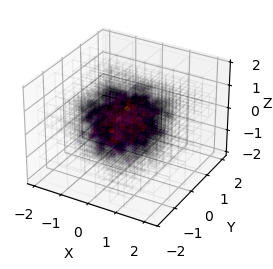

In [12]:
# Prepare the figure
fig = plt.figure(figsize = (3,3))
ax = fig.add_subplot(projection = '3d')

# Plot the tree histogram
poly = tree_histogram(ax,pts_samples,GAUSSIAN_samples,cmap = use_cmap,
               filled=None,verbose = True,dist = 'sigmoid',
               min_resolution = None,max_resolution = None,edgecolor_function = lambda color:(0,0,0,0.01))

# Edit some figure settings and save it
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.zaxis.labelpad=-3.5
fig.savefig('Images/4_Histogram-Tree_Gaussian_1.png',dpi = 300)

As another example, we can try the method on the dual-Gaussian bimodal case:

/var/folders/q8/trn9pvn13rz106_g091b9gqc0000gn/T/ipykernel_8089/3121198123.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = colormaps.get_cmap('inferno')


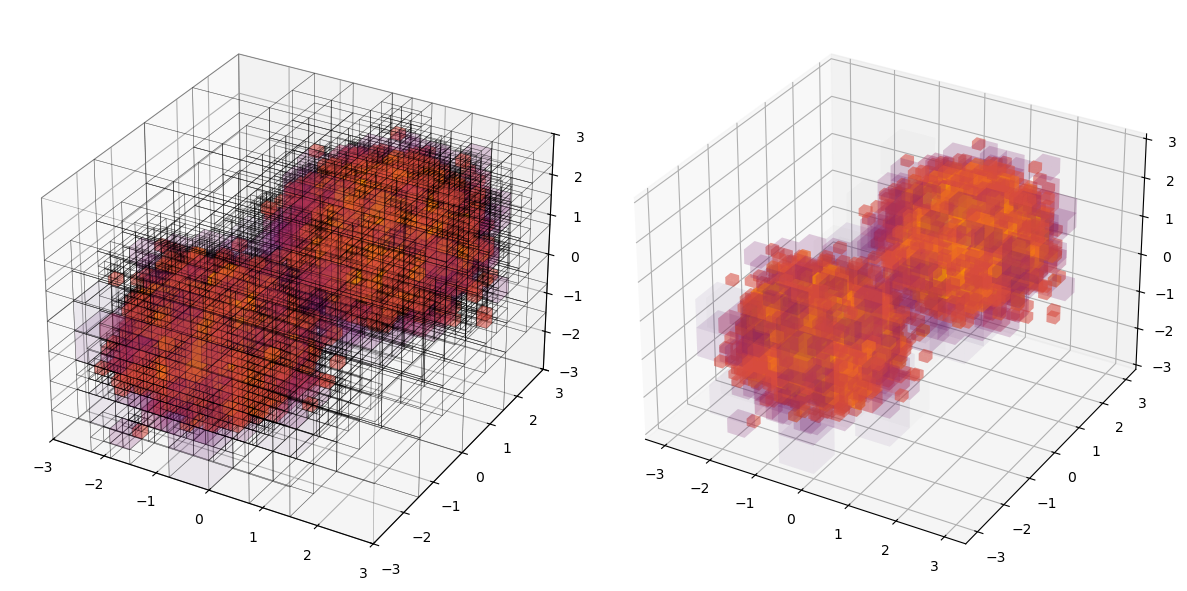

In [13]:
# Prepare the figure
fig = plt.figure(figsize = (6*2,6))
ax = fig.add_subplot(121,projection = '3d')
ax2 = fig.add_subplot(122,projection = '3d')

# Prepare the colormap and region to plot
cmap = colormaps.get_cmap('inferno')
use_cmap = cmap(np.arange(cmap.N))
use_cmap[:,-1] = np.linspace(0,1,cmap.N)**2
use_cmap = colors.ListedColormap(use_cmap)
d = 3

# Plot with edges colored
poly = tree_histogram(ax,np.array(pts_samples_bi),np.array(GAUSSIAN_samples_bi),cmap = use_cmap,
               filled=None,verbose = False,
               _range = [[-d,d],[-d,d],[-d,d]],
               min_resolution = 1,max_resolution = 5,
               vmin = 1,norm = LogNorm,edgecolor_function = lambda x:(0,0,0,0.2),linewidths = 0.4)

# Plot without edges colored
poly = tree_histogram(ax2,np.array(pts_samples_bi),np.array(GAUSSIAN_samples_bi),cmap = use_cmap,
               filled=None,verbose = False,
               _range = [[-d,d],[-d,d],[-d,d]],
               min_resolution = 1,max_resolution = 5,
               vmin = 1,norm = LogNorm)

# Edit some figure settings and save it
ax.set_xlim(-d,d)
ax.set_ylim(-d,d)
ax.set_zlim(-d,d)
fig.tight_layout()
fig.savefig('Images/6_Histogram-Tree Dual-Gaussian.png',dpi = 300)

# Rotating Plots

`cplt3d` also makes it easy to animate rotating 3d plots. The process is parallelized which makes it substantially faster for more complex plots:

In [14]:
if animate and __name__ == '__main__':
    folder_in = './Images'
    spin_3d_plot(fig,[ax,ax2],'Images/7_Gaussian_Histogram',step=1,merge=True,delete=True,fps = 15,
                parallel = True,verbose = True,Animation_Generation_Folder=folder_in,dpi = 300)

animating...
setup for parallel run
Using 10 cpus
preparing file structure...
./Images already exists, adding temp inside...
completed filestructure preparation
saving frames into ./Images/17251719
True - this folder and its contents will be deleted at the end of the run
the code will save into a(n) gif file
preparing saving function...
saving functions prepared
generating 360 animation frames...
 

Animation 0:   0%|          | 0/37 [00:00<?, ?it/s]

Animation 1:   0%|          | 0/37 [00:00<?, ?it/s]

Animation 2:   0%|          | 0/37 [00:00<?, ?it/s]

Animation 3:   0%|          | 0/37 [00:00<?, ?it/s]

Animation 4:   0%|          | 0/37 [00:00<?, ?it/s]

Animation 5:   0%|          | 0/37 [00:00<?, ?it/s]

Animation 6:   0%|          | 0/37 [00:00<?, ?it/s]

Animation 7:   0%|          | 0/37 [00:00<?, ?it/s]

Animation 8:   0%|          | 0/37 [00:00<?, ?it/s]

Animation 9:   0%|          | 0/27 [00:00<?, ?it/s]

finished generating animation
combining animation...
360 frames found:


/Users/benjamincohen/miniforge3/envs/Inflation/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Users/benjamincohen/miniforge3/envs/Inflation/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Users/benjamincohen/miniforge3/envs/Inflation/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Users/benjamincohen/miniforge3/envs/Inflation/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warni

Loading Frames:   0%|          | 0/360 [00:00<?, ?it/s]

saving at 15 fps...
removing animation generation folder: ./Images/17251719
